In [ ]:
!pip install --upgrade mpl_finance

In [ ]:
import numpy as np # библиотека расширенной математики
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.ticker as mticker
from mpl_finance import candlestick_ohlc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/CNYRUB_1.csv')

In [ ]:
data

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,CNYRUB_TOM,D,30120,0,8.8840,8.9260,8.8840,8.8840,2233000
1,CNYRUB_TOM,D,60120,0,8.9260,8.9380,8.8680,8.8680,1310000
2,CNYRUB_TOM,D,80120,0,8.9299,8.9319,8.8680,8.8761,920000
3,CNYRUB_TOM,D,90120,0,8.8780,8.8780,8.8226,8.8586,180821000
4,CNYRUB_TOM,D,100120,0,8.8345,8.8739,8.8081,8.8440,81655000
...,...,...,...,...,...,...,...,...,...
921,CNYRUB_TOM,D,280823,0,13.0800,13.1370,13.0000,13.0580,11039493000
922,CNYRUB_TOM,D,290823,0,13.0600,13.1810,13.0580,13.0940,10865699000
923,CNYRUB_TOM,D,300823,0,13.1270,13.1700,13.1020,13.1700,6720773000
924,CNYRUB_TOM,D,310823,0,13.1790,13.2200,13.1310,13.1700,7942159000


In [ ]:
for column in data.columns:
  missing = np.mean(data[column].isna()*100)
  print(f" {column} : {round(missing,1)}%")

 <TICKER> : 0.0%
 <PER> : 0.0%
 <DATE> : 0.0%
 <TIME> : 0.0%
 <OPEN> : 0.0%
 <HIGH> : 0.0%
 <LOW> : 0.0%
 <CLOSE> : 0.0%
 <VOL> : 0.0%


In [ ]:
data[data["<VOL>"]==0]

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>


In [ ]:
data[data["<HIGH>"]==data["<LOW>"]]

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>


In [ ]:
data1 = data.copy()
del data1['<TICKER>']
del data1['<DATE>']
del data1['<PER>']
del data1['<TIME>']
del data1['<VOL>']



In [ ]:
def graphic_ohlc(dataset):
    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    closep=dataset[:,[3]]
    highp=dataset[:,[1]]
    lowp=dataset[:,[2]]
    openp=dataset[:,[0]]
    date=range(len(closep))

    x = 0
    y = len(date)
    ohlc = []
    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x]
        ohlc.append(append_me)
        x+=1
    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)
    plt.xlabel('Candle')
    plt.ylabel('Price')
    plt.title('Candlestick sample representation')

    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



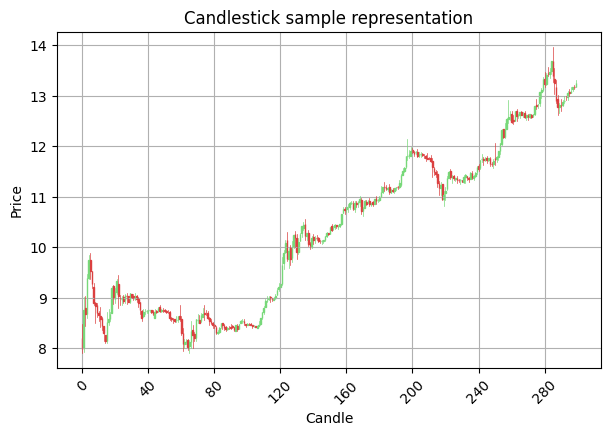

In [ ]:
graphic_ohlc(data1.tail(300).values)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
def graph(dataset):
  fig = go.Figure(data=[go.Candlestick(x=dataset.index,
                open=dataset['<OPEN>'], high=dataset['<HIGH>'],
                low=dataset['<LOW>'], close=dataset['<CLOSE>'])])

  fig.show()

In [ ]:
data2 = data.head(300)

In [ ]:
graph(data2)